In [13]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from scipy.ndimage import label
# Venv namesten


In [ ]:
# Accuracy - output images vs mask image - false positive % and false negative %%!
# Get average tumor size, also max and min tumor
# Tumor heatmap - if not on heatmap, then probably not tumor
# 
# 1. Check symmetry differences
# 2. Cancel out whites not on the heatmap
# 3. If a part has the largest connected white cluster , probably the tumor
# 4. Check if circle-like (Optional)

/tmp/ipykernel_2824/2051254359.py:24: RuntimeWarning: invalid value encountered in scalar divide
  dif1 = left_val/right_val
/tmp/ipykernel_2824/2051254359.py:25: RuntimeWarning: invalid value encountered in scalar divide
  dif2 = right_val/left_val
/tmp/ipykernel_2824/2051254359.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  dif2 = right_val/left_val
/tmp/ipykernel_2824/2051254359.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  dif1 = left_val/right_val


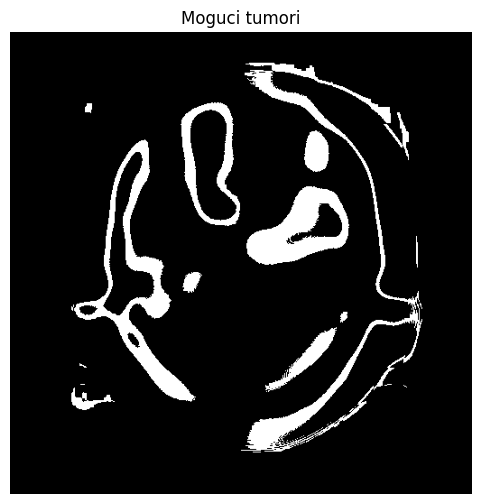

In [ ]:

img_path = './data/dataset/images/2.png'
img = Image.open(img_path).convert('L')  # grayscale

#blur
blurred_img = img.filter(ImageFilter.GaussianBlur(radius=10))
img_array = np.array(blurred_img).astype(np.float32)

# Step 2: Find asymmetric bright regions
height, width = img_array.shape
half_width = width // 2

asymmetry_mask = np.zeros_like(img_array, dtype=np.uint8)

for y in range(height):
    for x in range(half_width):
        left_val = img_array[y, x]
        right_val = img_array[y, width - 1 - x]  # mirror along vertical axis

        # If left is at least 10% brighter than right, mark it
        
        top = 1.55
        bot = 1.1
        
        dif1 = left_val/right_val
        dif2 = right_val/left_val
        if dif1 > bot and dif1<top:
            asymmetry_mask[y, x] = 1
        if dif2 > bot and dif2<top:
            asymmetry_mask[y, width - 1 - x] = 1

# Step 3: Visualize asymmetric regions
plt.figure(figsize=(6, 6))
plt.imshow(asymmetry_mask, cmap='gray')
plt.axis('off')
plt.title("Moguci tumori")
plt.show()